# Árvores de Decisão para Diagnóstico de Doença Cardíaco

## Imports

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

from custom_plot import *

In [92]:
# importando base de dados
X = pd.read_csv('heart-disease-uci/heart.csv')

In [93]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [94]:
print(X.shape)

(303, 14)


In [95]:
# feature engineering
y = X.target
X.drop(['target'], inplace=True, axis=1)

In [96]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [97]:
# aplicando o algoritmo de árvore de decisão
target_names = ["0","1"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


dectree_clf = DecisionTreeClassifier()
dectree_clf.fit(X_train, y_train)

y_pred = dectree_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names))

Accuracy: 0.7377049180327869
              precision    recall  f1-score   support

           0       0.70      0.58      0.64        24
           1       0.76      0.84      0.79        37

    accuracy                           0.74        61
   macro avg       0.73      0.71      0.72        61
weighted avg       0.73      0.74      0.73        61



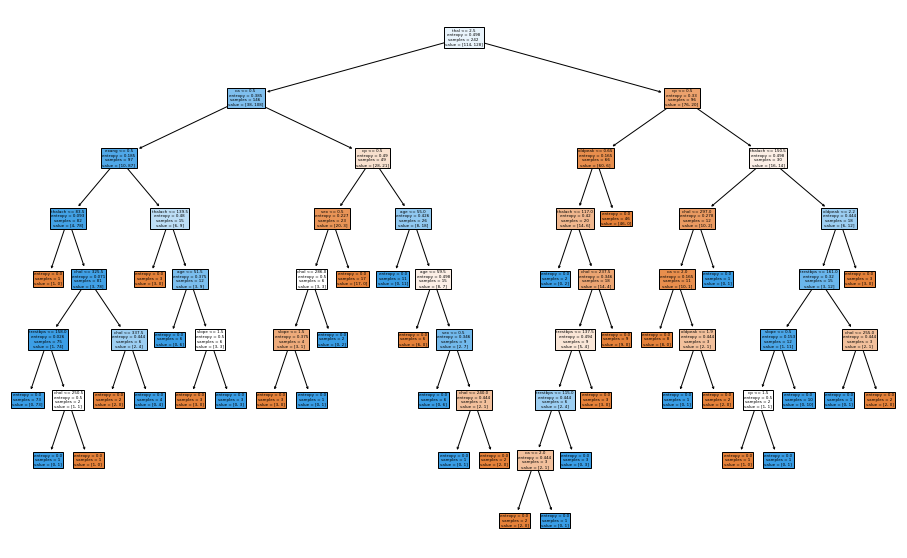

In [98]:
# plotando a árvore de decisão
feature_names = X.columns
plt.figure(figsize=(16, 10))
plot_tree(dectree_clf, filled=True, feature_names=feature_names)
plt.show()

In [99]:
# profundidade da árvore
dectree_clf.get_depth()

8

In [100]:
# Ajuste de hiperparâmetros via validação cruzada (precision)
tuned_parameters = {'criterion':('gini', 'entropy'), 'max_depth':range(1,30)}

scores = ['precision', 'recall']

score = scores[0]
print("# Ajuste dos hyper-parâmetros for %s" % score)
print()

clf = GridSearchCV(
    DecisionTreeClassifier(), tuned_parameters, cv=5, scoring='%s_macro' % score
)
clf.fit(X_train, y_train)


print("Grid scores do grupo de treinamento:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

# Ajuste dos hyper-parâmetros for precision

Grid scores do grupo de treinamento:

0.715 (+/-0.085) for {'criterion': 'gini', 'max_depth': 1}
0.793 (+/-0.090) for {'criterion': 'gini', 'max_depth': 2}
0.741 (+/-0.145) for {'criterion': 'gini', 'max_depth': 3}
0.723 (+/-0.122) for {'criterion': 'gini', 'max_depth': 4}
0.756 (+/-0.132) for {'criterion': 'gini', 'max_depth': 5}
0.733 (+/-0.162) for {'criterion': 'gini', 'max_depth': 6}
0.764 (+/-0.135) for {'criterion': 'gini', 'max_depth': 7}
0.745 (+/-0.148) for {'criterion': 'gini', 'max_depth': 8}
0.744 (+/-0.153) for {'criterion': 'gini', 'max_depth': 9}
0.745 (+/-0.130) for {'criterion': 'gini', 'max_depth': 10}
0.746 (+/-0.139) for {'criterion': 'gini', 'max_depth': 11}
0.749 (+/-0.129) for {'criterion': 'gini', 'max_depth': 12}
0.736 (+/-0.161) for {'criterion': 'gini', 'max_depth': 13}
0.749 (+/-0.145) for {'criterion': 'gini', 'max_depth': 14}
0.737 (+/-0.140) for {'criterion': 'gini', 'max_depth': 15}
0.760 (+/-0.141) for {'cri

C:\Users\Gustavo\Anaconda31\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


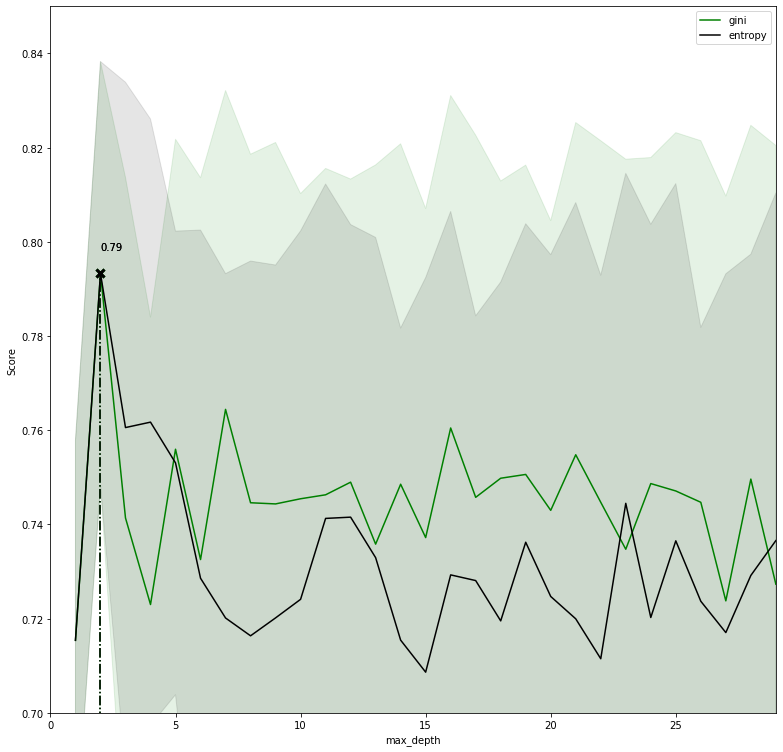

In [101]:
# plotando o resultado da validação cruzada para os críterios  gini e entropia
# a partir do ajuste de hiperparâmetros para precision
plt.figure(figsize=(13, 13))
plt.xlabel("max_depth")
plt.ylabel("Score")
ax = plt.gca()
ax.set_xlim(0, 29)
ax.set_ylim(0.7, 0.85)

results = clf.cv_results_
criterion_vector = results['param_criterion'].data
depth_vector = results['param_max_depth'].data
for criterion, color in zip(['gini', 'entropy'], ['g', 'k']):
    sample_score_mean = results['mean_test_score'][criterion_vector==criterion]
    sample_score_std = results['std_test_score'][criterion_vector==criterion]
    X_axis = np.array(depth_vector, dtype=float)[criterion_vector==criterion]
    ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                    sample_score_mean + sample_score_std,
                    alpha=0.1, color=color)
    ax.plot(X_axis, sample_score_mean, '-', color=color,
            alpha=1,
            label=criterion)

    best_index = np.nonzero(results['rank_test_score'] == 1)[0][0]
    best_score = results['mean_test_score'][best_index]

    # plota um x no melhor score de cada critério
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # grava o melhor score de cada critério
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

Melhores parâmetros no grupo de treinamento:

{'criterion': 'gini', 'max_depth': 2}

Relatório de Classificação no grupo de Teste:

              precision    recall  f1-score   support

           0       0.56      0.79      0.66        24
           1       0.81      0.59      0.69        37

    accuracy                           0.67        61
   macro avg       0.69      0.69      0.67        61
weighted avg       0.71      0.67      0.67        61




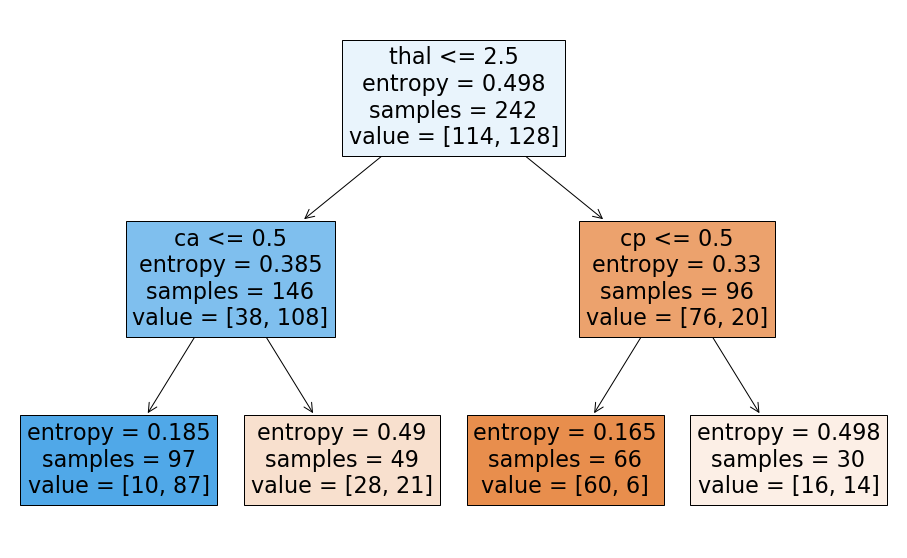

In [102]:
print("Melhores parâmetros no grupo de treinamento:")
print()
print(clf.best_params_)
print()
print("Relatório de Classificação no grupo de Teste:")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

plt.figure(figsize=(16, 10))
plot_tree(clf.best_estimator_, filled=True, feature_names=feature_names)
plt.show()

In [103]:
# Ajuste de hiperparâmetros via validação cruzada (recall)
score = scores[1]
print("# Ajuste dos hyper-parâmetros for %s" % score)
print()

clf = GridSearchCV(
    DecisionTreeClassifier(), tuned_parameters, cv=5, scoring='%s_macro' % score
)
clf.fit(X_train, y_train)


means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

# Ajuste dos hyper-parâmetros for recall

0.707 (+/-0.073) for {'criterion': 'gini', 'max_depth': 1}
0.788 (+/-0.092) for {'criterion': 'gini', 'max_depth': 2}
0.736 (+/-0.138) for {'criterion': 'gini', 'max_depth': 3}
0.722 (+/-0.141) for {'criterion': 'gini', 'max_depth': 4}
0.741 (+/-0.117) for {'criterion': 'gini', 'max_depth': 5}
0.751 (+/-0.171) for {'criterion': 'gini', 'max_depth': 6}
0.730 (+/-0.138) for {'criterion': 'gini', 'max_depth': 7}
0.722 (+/-0.165) for {'criterion': 'gini', 'max_depth': 8}
0.747 (+/-0.132) for {'criterion': 'gini', 'max_depth': 9}
0.718 (+/-0.138) for {'criterion': 'gini', 'max_depth': 10}
0.738 (+/-0.122) for {'criterion': 'gini', 'max_depth': 11}
0.737 (+/-0.113) for {'criterion': 'gini', 'max_depth': 12}
0.746 (+/-0.154) for {'criterion': 'gini', 'max_depth': 13}
0.725 (+/-0.134) for {'criterion': 'gini', 'max_depth': 14}
0.742 (+/-0.107) for {'criterion': 'gini', 'max_depth': 15}
0.730 (+/-0.122) for {'criterion': 'gini', 'max_depth': 16}
0.738 (

C:\Users\Gustavo\Anaconda31\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


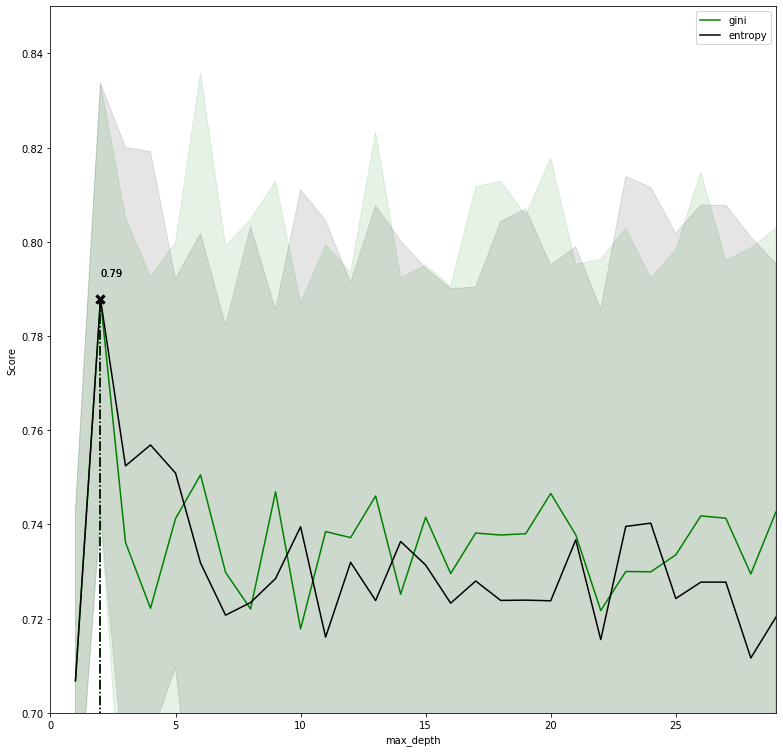

In [104]:
# plotando o resultado da validação cruzada para os críterios  gini e entropia
# a partir do ajuste de hiperparâmetros para recall
plt.figure(figsize=(13, 13))
plt.xlabel("max_depth")
plt.ylabel("Score")
ax = plt.gca()
ax.set_xlim(0, 29)
ax.set_ylim(0.7, 0.85)

results = clf.cv_results_
criterion_vector = results['param_criterion'].data
depth_vector = results['param_max_depth'].data
for criterion, color in zip(['gini', 'entropy'], ['g', 'k']):
    sample_score_mean = results['mean_test_score'][criterion_vector==criterion]
    sample_score_std = results['std_test_score'][criterion_vector==criterion]
    X_axis = np.array(depth_vector, dtype=float)[criterion_vector==criterion]
    ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                    sample_score_mean + sample_score_std,
                    alpha=0.1, color=color)
    ax.plot(X_axis, sample_score_mean, '-', color=color,
            alpha=1,
            label=criterion)

    best_index = np.nonzero(results['rank_test_score'] == 1)[0][0]
    best_score = results['mean_test_score'][best_index]

    # plota um x no melhor score de cada critério
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()


Melhores parâmetros no grupo de treinamento:

{'criterion': 'gini', 'max_depth': 2}

Relatório de Classificação no grupo de Teste:

              precision    recall  f1-score   support

           0       0.56      0.79      0.66        24
           1       0.81      0.59      0.69        37

    accuracy                           0.67        61
   macro avg       0.69      0.69      0.67        61
weighted avg       0.71      0.67      0.67        61




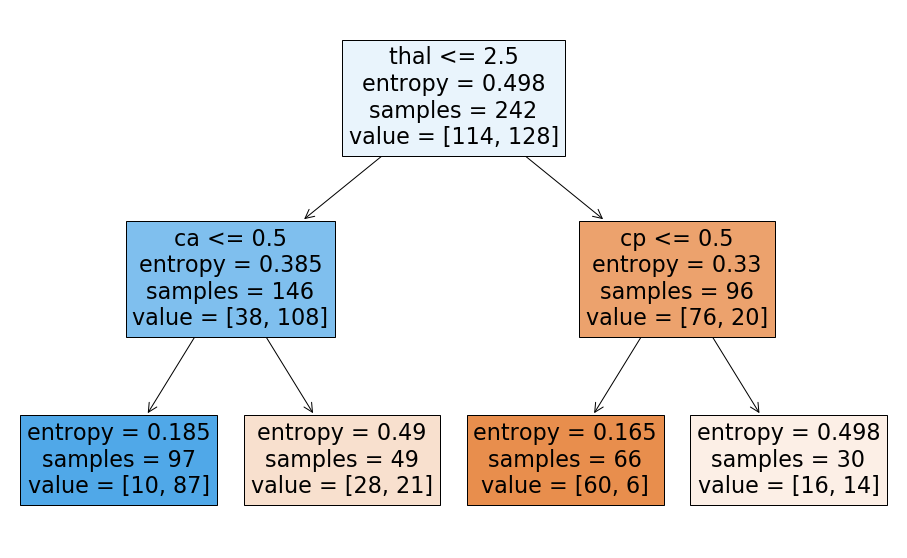

In [105]:
print("Melhores parâmetros no grupo de treinamento:")
print()
print(clf.best_params_)
print()
print("Relatório de Classificação no grupo de Teste:")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

plt.figure(figsize=(16, 10))
plot_tree(clf.best_estimator_, filled=True, feature_names=feature_names)
plt.show()

In [106]:
X = pd.read_csv('heart-disease-uci/heart.csv')
y = X.target
X.drop(['target'], inplace=True, axis=1)
target_names = ["0","1"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = GridSearchCV(
    DecisionTreeClassifier(), tuned_parameters, cv=5, scoring=scores, refit='recall'
)
clf.fit(X_train, y_train)


means = clf.cv_results_['mean_test_precision']
stds = clf.cv_results_['std_test_precision']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

0.699 (+/-0.102) for {'criterion': 'gini', 'max_depth': 1}
0.781 (+/-0.098) for {'criterion': 'gini', 'max_depth': 2}
0.816 (+/-0.089) for {'criterion': 'gini', 'max_depth': 3}
0.787 (+/-0.130) for {'criterion': 'gini', 'max_depth': 4}
0.785 (+/-0.064) for {'criterion': 'gini', 'max_depth': 5}
0.772 (+/-0.074) for {'criterion': 'gini', 'max_depth': 6}
0.754 (+/-0.023) for {'criterion': 'gini', 'max_depth': 7}
0.747 (+/-0.037) for {'criterion': 'gini', 'max_depth': 8}
0.768 (+/-0.068) for {'criterion': 'gini', 'max_depth': 9}
0.769 (+/-0.048) for {'criterion': 'gini', 'max_depth': 10}
0.746 (+/-0.054) for {'criterion': 'gini', 'max_depth': 11}
0.762 (+/-0.053) for {'criterion': 'gini', 'max_depth': 12}
0.750 (+/-0.075) for {'criterion': 'gini', 'max_depth': 13}
0.759 (+/-0.049) for {'criterion': 'gini', 'max_depth': 14}
0.762 (+/-0.038) for {'criterion': 'gini', 'max_depth': 15}
0.746 (+/-0.041) for {'criterion': 'gini', 'max_depth': 16}
0.743 (+/-0.036) for {'criterion': 'gini', 'max_d

C:\Users\Gustavo\Anaconda31\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [107]:
means = clf.cv_results_['mean_test_recall']
stds = clf.cv_results_['std_test_recall']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

0.769 (+/-0.146) for {'criterion': 'gini', 'max_depth': 1}
0.748 (+/-0.215) for {'criterion': 'gini', 'max_depth': 2}
0.806 (+/-0.107) for {'criterion': 'gini', 'max_depth': 3}
0.769 (+/-0.164) for {'criterion': 'gini', 'max_depth': 4}
0.776 (+/-0.176) for {'criterion': 'gini', 'max_depth': 5}
0.784 (+/-0.156) for {'criterion': 'gini', 'max_depth': 6}
0.791 (+/-0.145) for {'criterion': 'gini', 'max_depth': 7}
0.740 (+/-0.197) for {'criterion': 'gini', 'max_depth': 8}
0.755 (+/-0.072) for {'criterion': 'gini', 'max_depth': 9}
0.748 (+/-0.158) for {'criterion': 'gini', 'max_depth': 10}
0.712 (+/-0.154) for {'criterion': 'gini', 'max_depth': 11}
0.705 (+/-0.102) for {'criterion': 'gini', 'max_depth': 12}
0.705 (+/-0.080) for {'criterion': 'gini', 'max_depth': 13}
0.719 (+/-0.081) for {'criterion': 'gini', 'max_depth': 14}
0.755 (+/-0.115) for {'criterion': 'gini', 'max_depth': 15}
0.741 (+/-0.121) for {'criterion': 'gini', 'max_depth': 16}
0.748 (+/-0.061) for {'criterion': 'gini', 'max_d

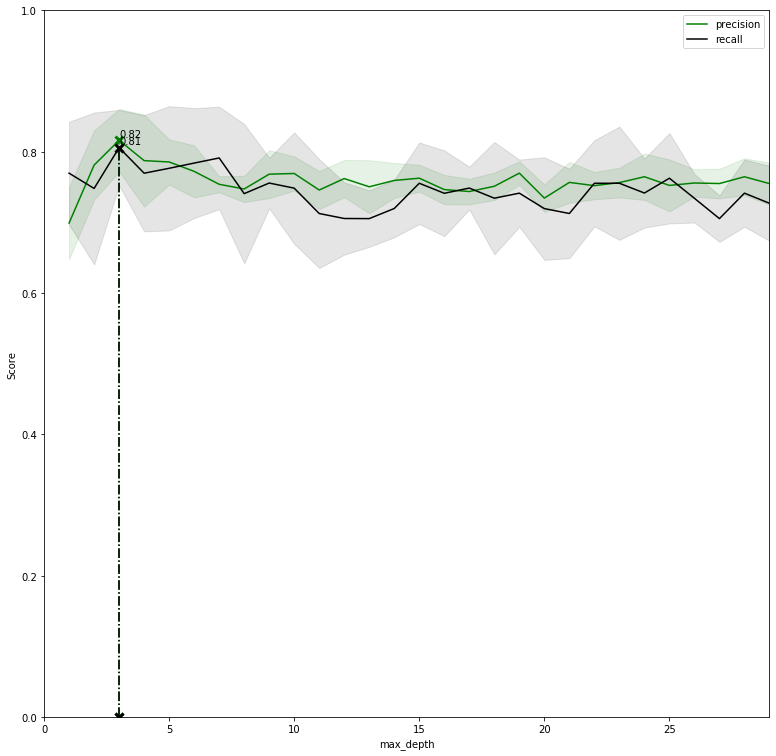

In [108]:
#Plot CV
plt.figure(figsize=(13, 13))
plt.xlabel("max_depth")
plt.ylabel("Score")
ax = plt.gca()
ax.set_xlim(0, 29)
ax.set_ylim(0, 1)

results = clf.cv_results_
criterion_vector = results['param_criterion'].data
criterion='gini' 
depth_vector = results['param_max_depth'].data
for score, color in zip(scores, ['g', 'k']):
    sample_score_mean = results[f'mean_test_{score}'][criterion_vector==criterion]
    sample_score_std = results[f'std_test_{score}'][criterion_vector==criterion]
    X_axis = np.array(depth_vector, dtype=float)[criterion_vector==criterion]
    ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                    sample_score_mean + sample_score_std,
                    alpha=0.1, color=color)
    ax.plot(X_axis, sample_score_mean, '-', color=color,
            alpha=1,
            label=score)

    best_index = np.argmin(results[f'rank_test_{score}'][criterion_vector==criterion])
    best_score = results[f'mean_test_{score}'][criterion_vector==criterion][best_index]

    # plota um x no melhor score de cada critério
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)
  
    # grava o melhor score de cada critério
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()